# K-Nearest Neighbors(KNN) algorithm 

It's a supervised learning algorithm that can be used for both classification and regression problems. It's a non-parametric algorithm, which means that it doesn't make any assumptions on the underlying data. It's also a lazy learning algorithm, which means that it doesn't learn a discriminative function from the training data but memorizes the training dataset instead.

We will dive into classification problem using KNN algorithm.

To classify a new data point, we need to find the <strong>distance</strong> between the new data point and all the data points in the training set. Then we need to find the k nearest data points to the new data point. The new data point will be classified based on the <strong>majority class</strong> of the k nearest data points.

<p align="center"><img src="../../../assets//knn_example.png" style="width: 1000px; height: 400px; object-fit: cover"></p>

Algorithm steps:
1. Choose the number of k neighbors
2. Calculate the distance between the new data point and all the data points in the training set (Euclidean distance, Manhattan distance, Minkowski distance, etc.)
3. Sort the distances and determine the k nearest data points
4. Classify the new data point based on the majority class of the k nearest data points $ mode(y_1, y_2, ..., y_k) = \underset{y}{\operatorname{argmax}}\sum_{i=1}^{k}I(y_i = y) $

## Distance

To find the **distance** between two data points, we can use different distance metrics. The most common distance metrics are:
| Metric | Formula |
| --- | --- |
| Euclidean Distance | $$ d(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$ |
| Manhattan Distance | $$ d(x, y) = \sum_{i=1}^{n}x_i - y_i $$ |
| Chebyshev Distance | $$ d(x, y) = \max(x_1 - y_1, x_2 - y_2, ..., x_n - y_n) $$ |
| Hamming Distance | $$ d(x, y) = \sum_{i=1}^{n}I(x_i \neq y_i) $$ |

## Implementation

In [2]:
import numpy as np

class KNeighborsClassifier:
    '''
    K-Nearest Neighbors Classifier

    Attributes:
        k (int): number of neighbors to consider
        dist_metric (str): distance metric to

    Methods:
        _most_common(arr: np.ndarray) -> int: Get the most common element in an array
        _calculate_distance(points: np.ndarray) -> float: Calculate distance between two points using the specified distance metric
        fit(X: np.ndarray, y: np.ndarray) -> None: Fit the model on the training data
        predict(X: np.ndarray) -> np.ndarray: Predict the classes of the input samples
        evaluate(X: np.ndarray, y: np.ndarray) -> float: Evaluate the model on a test set
    '''
    def __init__(self, k: int = 5, dist_metric: str = 'euclidean') -> None:
        self.k = k
        self.dist_metric = dist_metric

    def _most_common(self, arr: np.ndarray) -> int:
        '''
        Get the most common element in an array
        
        Args:
            arr: 1D array

        Returns: most common element in arr
        '''
        return np.bincount(arr).argmax()

    def _calculate_distance(self, points: np.ndarray) -> float:
        '''
        Calculate distance between two points using the specified distance metric

        Args:
            points: 2D array with shape (2, n_features)
        
        Returns: distance between two points
        '''
        if self.dist_metric == 'euclidean':
            return np.sqrt(np.sum((points[0] - points[1])**2))
        elif self.dist_metric == 'manhattan':
            return np.abs(points[0] - points[1])
        elif self.dist_metric == 'chebychev':
            return np.max(np.abs(points[0] - points[1]))
        elif self.dist_metric == 'hemming':
            return np.sum(points[0] != points[1]) / len(points[0])

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        '''
        Fit the model on the training data

        Args:
            X: 2D array with shape (n_samples, n_features)
            y: 1D array with shape (n_samples)
        '''
        self.X_train = X
        self.y_train = y
    
    def predict(self, X: np.ndarray) -> np.ndarray:
        '''
        Predict the classes of the input samples

        Args:
            X: 2D array with shape (n_samples, n_features)

        Returns: 1D array with shape (n_samples)
        '''
        predictions = []

        for x in X:
            # Calculate distances between x and all training samples
            distances = np.array([self._calculate_distance(np.array([x, x_train])) for x_train in self.X_train])
            # Get k nearest samples
            k_nearest = np.argsort(distances)[:self.k]
            # Get the classes of k nearest samples
            y_sorted = self.y_train[k_nearest]
            # Append the majority class of the k-nearest samples to predictions
            predictions.append(self._most_common(y_sorted))
            
        return predictions
    
    def evaluate(self, X: np.ndarray, y: np.ndarray) -> float:
        '''
        Evaluate the model on a test set
        
        Args:
            X: 2D array with shape (n_samples, n_features)
            y: 1D array with shape (n_samples)
            
        Returns: accuracy of the model
        '''
        return np.sum(self.predict(X) == y) / len(y)

# Dataset
To test the performance of the KNN algorithm, we will use the **Iris dataset**. The dataset contains 150 samples of 3 different species of Iris flower (Iris **setosa**, Iris **virginica** and Iris **versicolor**). Four features were measured from each sample: the **length** and the **width** of the **sepals** and **petals**, in centimeters.

<p align="center"><img src="../../../assets/iris.png" style="width: 800px; height: 350px; object-fit: cover"></p>

The dataset is available in the **sklearn** library. We will use the **train_test_split** function to split the dataset into training and testing sets to avoid overfitting and evaluate the performance of the model.

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = load_iris().data    # 4 features -> sepal length, sepal width, petal length, petal width
y = load_iris().target  # 3 species of Iris -> 0-setosa, 1-versicolor, 2-virginica

## Train and Test

In [4]:
n_tests = 50 # Number of tests to run
accuracies = [] # List to store all accuracies

model = KNeighborsClassifier(dist_metric='euclidean')

for i in range(n_tests):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    model.fit(X_train, y_train)
    accuracies.append(model.evaluate(X_test, y_test))

print(f'Average accuracy: {np.mean(accuracies):.3f}')   # Average accuracy is the mean of all accuracies => formula is sum(x) / n
print(f'Standard deviation: {np.std(accuracies):.3f}')  # Standard deviation is a measure of how spread out numbers are => formula is sqrt(sum((x - mean)**2) / n)
print(f'Minimum accuracy: {np.min(accuracies)}')
print(f'Maximum accuracy: {np.max(accuracies)}')

Average accuracy: 0.963
Standard deviation: 0.034
Minimum accuracy: 0.8333333333333334
Maximum accuracy: 1.0


### Plot the data

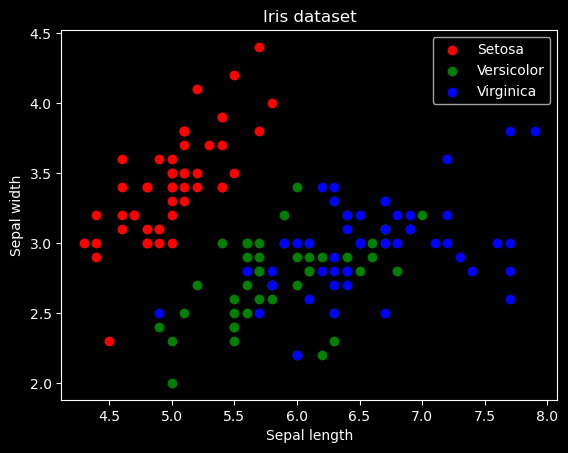

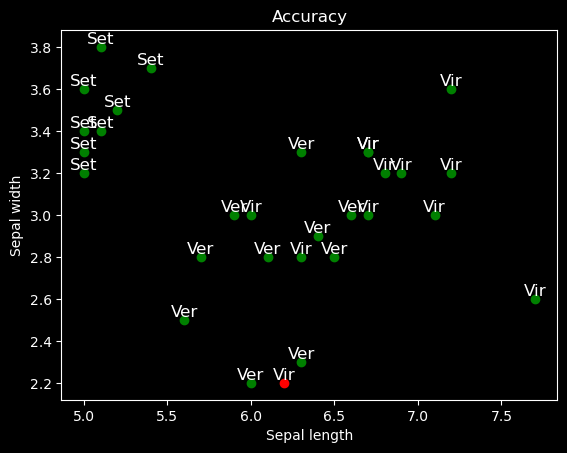

In [19]:
import matplotlib.pyplot as plt

# Plot iris dataset
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r', label='Setosa')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g', label='Versicolor')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], c='b', label='Virginica')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris dataset')
plt.legend()
plt.show()

# Plot correctly and incorrectly classified samples with name of the species
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

names = ['Setosa', 'Versicolor', 'Virginica']

for i, (pred, true) in enumerate(zip(predictions, y_test)):
    if pred == true:
        plt.scatter(X_test[i][0], X_test[i][1], c='g')
    else:
        plt.scatter(X_test[i][0], X_test[i][1], c='r')
    plt.text(X_test[i][0], X_test[i][1], names[predictions[i]][:3], fontsize=12, ha='center', va='bottom')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Accuracy')
plt.show()

## Acknowledgements
This [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris) is taken from the [UCI Machine Learning Repository](https://archive-beta.ics.uci.edu/dataset/53/iris) and is also available on [Kaggle](https://www.kaggle.com/uciml/iris).

R.A. Fisher and Michael Marshall